In [2]:
import pandas as pd
import numpy as np

#Предварительный обзор данных
df = pd.read_csv('features.csv', index_col='match_id')
df.describe()

,start_time,lobby_type,r1_hero,r1_level,r1_xp,r1_gold,r1_lh,r1_kills,r1_deaths,r1_items,...,dire_boots_count,dire_ward_observer_count,dire_ward_sentry_count,dire_first_ward_time,duration,radiant_win,tower_status_radiant,tower_status_dire,barracks_status_radiant,barracks_status_dire
count,9.723000e+04,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,...,97230.000000,97230.000000,97230.000000,95404.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000
mean,1.444232e+09,2.630999,51.517104,3.442672,1233.405801,1147.899702,11.231996,0.357009,0.362285,8.271315,...,3.349553,2.448339,0.689119,-6.901922,2332.247886,0.518503,1309.227790,1286.310820,40.599095,41.337036
std,5.515393e+06,2.835761,32.564211,1.111741,566.588895,464.111662,9.041620,0.663889,0.626704,2.497575,...,1.155609,0.813459,0.710122,40.701397,715.806850,0.499660,853.921365,851.009148,27.871645,27.064873
min,1.430199e+09,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-84.000000,900.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.440815e+09,1.000000,22.000000,3.000000,767.000000,746.000000,2.000000,0.000000,0.000000,7.000000,...,3.000000,2.000000,0.000000,-31.000000,1818.000000,0.000000,36.000000,256.000000,3.000000,3.000000
50%,1.446338e+09,1.000000,50.000000,3.000000,1175.000000,1113.000000,11.000000,0.000000,0.000000,8.000000,...,3.000000,2.000000,1.000000,-16.000000,2268.000000,1.000000,1824.000000,1798.000000,63.000000,60.000000
75%,1.448829e+09,7.000000,75.000000,4.000000,1704.000000,1479.000000,19.000000,1.000000,1.000000,10.000000,...,4.000000,3.000000,1.000000,8.000000,2778.000000,1.000000,1974.000000,1974.000000,63.000000,63.000000
max,1.450313e+09,7.000000,112.000000,6.000000,3319.000000,4332.000000,47.000000,8.000000,5.000000,34.000000,...,9.000000,9.000000,13.000000,300.000000,8452.000000,1.000000,2047.000000,2047.000000,63.000000,63.000000


# 1.градиентный бустинг "в лоб"

In [2]:
#Обзор пропусков в данных
rows = len(df)
counts = df.describe().T['count']
counts_na = counts[counts < rows]
counts_na.apply(lambda a: (rows - a) / rows)

first_blood_time               0.201100
first_blood_team               0.201100
first_blood_player1            0.201100
first_blood_player2            0.452402
radiant_bottle_time            0.161380
radiant_courier_time           0.007117
radiant_flying_courier_time    0.282619
radiant_first_ward_time        0.018883
dire_bottle_time               0.166029
dire_courier_time              0.006953
dire_flying_courier_time       0.268415
dire_first_ward_time           0.018780
Name: count, dtype: float64

Какие признаки имеют пропуски среди своих значений?  
first_blood_time - игровое время первой крови  
first_blood_team- команда, совершившая первую кровь (0 — Radiant, 1 — Dire)  
first_blood_player1 - игрок, причастный к событию  
first_blood_player2 - второй игрок, причастный к событию, возможно, второй игрок не успел сделать это в течении первых 5 минут  
radiant_bottle_time: время первого приобретения командой предмета "bottle"  
radiant_courier_time: время приобретения предмета "courier"  
radiant_flying_courier_time - время приобретения предмета "flying_courier"   
radiant_first_ward_time: время установки командой первого "наблюдателя", т.е. предмета, который позволяет видеть часть игрового поля
dire_bottle_time - время первого приобретения командой предмета "bottle"  
dire_courier_time - время приобретения предмета "courier"  
dire_flying_courier_time - время приобретения предмета "flying_courier"   
radiant_first_ward_time - время установки командой первого "наблюдателя", т.е. предмета, который позволяет видеть часть игрового поля
  
Что могут означать пропуски в этих признаках (ответьте на этот вопрос для двух любых признаков)?  
first_blood_time - игровое время первой крови вполне возможно, что люди как-то развивали как-то своих героев,   
или еще какие-то манипуляции, чтобы найти протвников. Возможно, обе команды принимали оборонительные сратегии одновременно  
radiant_bottle_time - на сколько понял, этот предмет покупается за золото, а его в первые 5 минут можно просто не набрать,  
поэтому есть пропуски  

In [4]:
# Загружаем данные
train = pd.read_csv('features.csv', index_col='match_id')
test = pd.read_csv('features_test.csv', index_col='match_id')

# Удаляем признаки, связанные с итогами матча
train.drop(['duration', 
         'tower_status_radiant', 
         'tower_status_dire', 
         'barracks_status_radiant', 
         'barracks_status_dire'
        ], axis=1, inplace=True)

# И разделяем датасет на признаки и целевую переменную
X = train
y = train['radiant_win'].to_frame()
del train['radiant_win']

In [5]:
# Заменяем пропуски на 0
X = X.fillna(0)

In [6]:
import time
import datetime
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score

%matplotlib inline

kf = KFold(n_splits=5, shuffle=True, random_state=242)

In [11]:
scores = []
nums = [10, 20, 30, 50, 100 ,150, 200]
for n in nums:
    print ('time', str(n))
    model = GradientBoostingClassifier(n_estimators=n, random_state=242)
    start_time = datetime.datetime.now()
    model_scores = cross_val_score(model, X, y, cv=kf, scoring='roc_auc', n_jobs=-1)
    print ('Elapsed time:', datetime.datetime.now() - start_time)
    print (model_scores)
    scores.append(np.mean(model_scores))

time 10
Elapsed time: 0:01:15.877836
[0.65980651 0.66777557 0.65838509 0.66828862 0.66997503]
time 20
Elapsed time: 0:02:23.171823
[0.6775204  0.68219983 0.68087028 0.6850183  0.68589328]
time 30
Elapsed time: 0:03:18.073410
[0.68551961 0.68821462 0.68837719 0.69322648 0.69344272]
time 50
Elapsed time: 0:05:28.829010
[0.69402499 0.69579686 0.6964178  0.7011311  0.70113322]
time 100
Elapsed time: 0:10:54.841342
[0.70282263 0.70398324 0.70501392 0.7112722  0.71010923]
time 150
Elapsed time: 0:16:23.964886
[0.70678498 0.70900304 0.70885903 0.71553257 0.714812  ]
time 200
Elapsed time: 0:18:26.563226
[0.71010044 0.71232212 0.71217942 0.71903864 0.71847042]


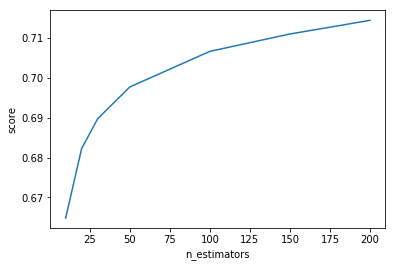

In [12]:
plt.plot(nums, scores)
plt.xlabel('n_estimators')
plt.ylabel('score')
plt.show()

Кросс-валидация для градиентного бустинга с 30 деревьями заняла 0:03:18.
Показатель метрики качества AUC-ROC в таком случае равен 0.685.
Увеличение количества деревьев также увеличивает показатель метрики AUC-ROC, приближая его к 0.72. 
Для достижения большего качества имеет смысл использовать более 30 деревьев. 
Для ускорения обучения можно использовать не всю выборку, а некоторое ее подмножество — например, половину объектов. Также можно уменьшить глубину деревьев (max_depth).

# 2. Логистическая регрессия

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

kf = KFold(n_splits=5, shuffle=True, random_state=242)

C:\Users\programmer\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\programmer\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


C = 1e-05
[0.69102573 0.69706117 0.68960891 0.69937079 0.6991955 ]
Elapsed time: 0:00:05.094730
C = 0.0001
[0.70781185 0.71172534 0.70638792 0.71620581 0.71510638]
Elapsed time: 0:00:06.809112
C = 0.001
[0.713621   0.71459327 0.71239243 0.72184598 0.71988447]
Elapsed time: 0:00:12.531884
C = 0.01
[0.71408367 0.71407412 0.71284101 0.72237377 0.71999192]
Elapsed time: 0:00:16.960697
C = 0.1
[0.71409741 0.71392161 0.71286984 0.72242197 0.71995059]
Elapsed time: 0:00:17.741322
C = 1.0
[0.71409836 0.71390757 0.71287185 0.72242916 0.71994517]
Elapsed time: 0:00:19.273689
C = 10.0
[0.71409807 0.71390644 0.71287206 0.72242974 0.71994469]
Elapsed time: 0:00:20.158936
C = 100.0
[0.71409822 0.71390639 0.71287227 0.72242957 0.71994453]
Elapsed time: 0:00:18.133402
C = 1000.0
[0.71409818 0.71390645 0.71287222 0.72242963 0.71994453]
Elapsed time: 0:00:17.926127
C = 10000.0
[0.71409817 0.71390647 0.71287222 0.72242964 0.71994451]
Elapsed time: 0:00:17.679280
C = 100000.0
[0.71409817 0.71390647 0.7128

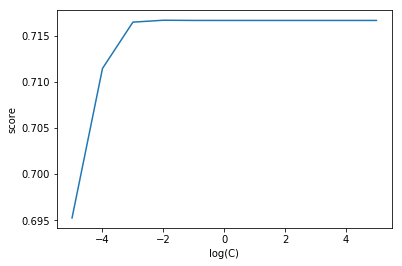

In [20]:
def start_test():
    scores = []
    C_pow_range = range(-5, 6)
    C_range = [10.0 ** i for i in C_pow_range]
    for C in C_range:
        start_time = datetime.datetime.now()
        print('C =', str(C))
        model = LogisticRegression(C=C, random_state=242, n_jobs=-1)
        model_scores = cross_val_score(model, X, y, cv=kf, scoring='roc_auc', n_jobs=-1)
        print(model_scores)
        print('Elapsed time:', datetime.datetime.now() - start_time)      
        scores.append(np.mean(model_scores))

    plt.plot(C_pow_range, scores)
    plt.xlabel('log(C)')
    plt.ylabel('score')
    plt.show()
    
    max_score = max(scores)
    max_score_index = scores.index(max_score)
    return C_range[max_score_index], max_score
C_range_max_score_index, max_score = start_test()

In [21]:
print(C_range_max_score_index)
print(max_score)

0.01
0.7166728970202303


Наилучшее значение показателя AUC-ROC достигается при C = 0.01 и равно 0.71. 
Это сравнимо с градиентным бустингом по 200 деревьям, при этом логистическая регрессия работает заметно быстрее.

C = 1e-05
[0.50891576 0.51186345 0.5105742  0.51884706 0.51697229]
Elapsed time: 0:00:03.008441
C = 0.0001
[0.50891576 0.51186345 0.5105742  0.51884706 0.51697229]
Elapsed time: 0:00:03.029007
C = 0.001
[0.50891576 0.51186345 0.5105742  0.51884706 0.51697229]
Elapsed time: 0:00:03.122155
C = 0.01
[0.50891576 0.51186345 0.5105742  0.51884706 0.51697229]
Elapsed time: 0:00:02.979054
C = 0.1
[0.50891576 0.51186345 0.5105742  0.51884706 0.51697229]
Elapsed time: 0:00:02.862253
C = 1.0
[0.50891576 0.51186345 0.5105742  0.51884706 0.51697229]
Elapsed time: 0:00:03.158708
C = 10.0
[0.50891576 0.51186345 0.5105742  0.51884706 0.51697229]
Elapsed time: 0:00:03.032001
C = 100.0
[0.50891576 0.51186345 0.5105742  0.51884706 0.51697229]
Elapsed time: 0:00:02.925866
C = 1000.0
[0.50891576 0.51186345 0.5105742  0.51884706 0.51697229]
Elapsed time: 0:00:02.909650
C = 10000.0
[0.50891576 0.51186345 0.5105742  0.51884706 0.51697229]
Elapsed time: 0:00:02.907819
C = 100000.0
[0.50891576 0.51186345 0.5105

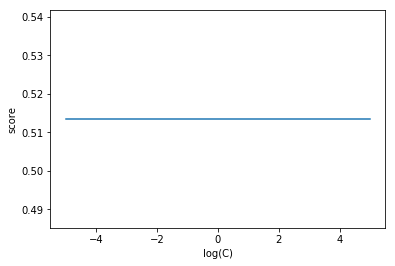

In [23]:
# удаляем категориальные признаки
# Загружаем данные
train = pd.read_csv('features.csv', index_col='match_id')
test = pd.read_csv('features_test.csv', index_col='match_id')

# Удаляем признаки, связанные с итогами матча
train.drop(['duration', 
         'tower_status_radiant', 
         'tower_status_dire', 
         'barracks_status_radiant', 
         'barracks_status_dire'
        ], axis=1, inplace=True)

# И разделяем датасет на признаки и целевую переменную
X = train
y = train['radiant_win'].to_frame()
del train['radiant_win']
# удаляем категориальные признаки
X = X.fillna(0)
del X['lobby_type']
for n in range(1, 6):
    del X['r{}_hero'.format(n)]
    del X['d{}_hero'.format(n)]

C_range_max_score_index, max_score = start_test()

Удаление категориальных признаков повлияло на качество предсказания. 
От качеств героя зависит его возможность победить

In [24]:
print(C_range_max_score_index)
print(max_score)

1e-05
0.513434553246413


Всего героев в игре: 112


C:\Users\programmer\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\programmer\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


C = 1e-05
[0.69494009 0.70096007 0.69355759 0.70353665 0.70346657]
Elapsed time: 0:00:50.115342
C = 0.0001
[0.72156686 0.72459563 0.71977958 0.73021855 0.7296553 ]
Elapsed time: 0:00:08.837623
C = 0.001
[0.74358067 0.74266078 0.74252753 0.75202967 0.75146139]
Elapsed time: 0:00:15.145977
C = 0.01
[0.74894095 0.74714361 0.74945921 0.75754937 0.75622866]
Elapsed time: 0:00:22.521432
C = 0.1
[0.74917036 0.7471827  0.75018633 0.75758375 0.75611009]
Elapsed time: 0:00:29.636967
C = 1.0
[0.74916966 0.74714099 0.75024988 0.75753713 0.75604957]
Elapsed time: 0:00:32.327676
C = 10.0
[0.74916835 0.74713638 0.75025491 0.75753189 0.75604299]
Elapsed time: 0:00:32.320949
C = 100.0
[0.74916849 0.74713624 0.75025512 0.75753189 0.75604151]
Elapsed time: 0:00:32.174764
C = 1000.0
[0.7491677  0.74713631 0.7502553  0.75753177 0.75604123]
Elapsed time: 0:00:32.353809
C = 10000.0
[0.74916768 0.74713647 0.75025541 0.75753192 0.75604141]
Elapsed time: 0:00:34.301442
C = 100000.0
[0.74916766 0.74713625 0.7502

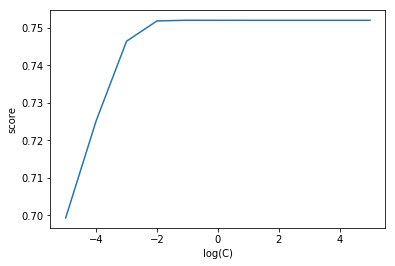

In [30]:
# удаляем категориальные признаки
# Загружаем данные
train = pd.read_csv('features.csv', index_col='match_id')
test = pd.read_csv('features_test.csv', index_col='match_id')

# Удаляем признаки, связанные с итогами матча
train.drop(['duration', 
         'tower_status_radiant', 
         'tower_status_dire', 
         'barracks_status_radiant', 
         'barracks_status_dire'
        ], axis=1, inplace=True)

# И разделяем датасет на признаки и целевую переменную
X = train
y = train['radiant_win'].to_frame()
del train['radiant_win']
# удаляем категориальные признаки
X = X.fillna(0)

heroes = pd.read_csv('heroes.csv')
print('Всего героев в игре:', len(heroes))
X_pick = np.zeros((X.shape[0], len(heroes)))
for i, match_id in enumerate(X.index):
    for p in range(5):
        X_pick[i, X.loc[match_id, 'r%d_hero' % (p+1)]-1] = 1
        X_pick[i, X.loc[match_id, 'd%d_hero' % (p+1)]-1] = -1

X_hero=pd.DataFrame(X_pick, index=X.index)


del X['lobby_type']
for n in range(1, 6):
    del X['r{}_hero'.format(n)]
    del X['d{}_hero'.format(n)]

scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), index = X.index)

X_hero=pd.DataFrame(X_pick, index=X.index)
X = pd.concat([X, X_hero], axis=1)

C_range_max_score_index, max_score = start_test()

После добавления "мешка слов" по героям качество заметно улучшилось. 
Наилучшее значение показателя AUC-ROC достигается при C = 0.1 и равно 0.75. 
Это объясняется тем, что вместо отсутствия данных о героях или случайного шума из 
id мы имеем осмысленную разреженную матрицу для построения предсказания.